<a href="https://colab.research.google.com/github/AlexanderSlokov/aiClassPracticeAssignments/blob/main/FuzzyControllerEx4VacuumCleaner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [30]:
#add control about the CLEANESS of the surface
cleaness = ctrl.Antecedent(np.arange(0,1.1,0.1),'cleaness')

#add control about the HARDESS of the surface
hardess = ctrl.Antecedent(np.arange(0,1.1,0.1),'hardess')


In [31]:
#output is the VACUUM'S POWER form 0 to 100, TICK 1
power = ctrl.Consequent(np.arange(0,101,1),'power')

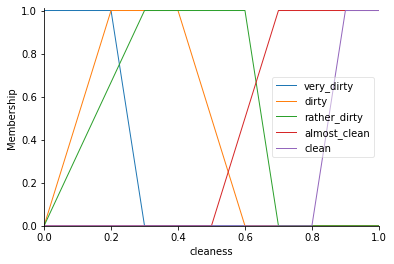

In [32]:
cleaness['very_dirty'] = fuzz.trapmf(cleaness.universe,[0,0,0.2,0.3])
cleaness['dirty'] = fuzz.trapmf(cleaness.universe,[0,0.2,0.4,0.6])
cleaness['rather_dirty'] = fuzz.trapmf(cleaness.universe,[0,0.3,0.6,0.7])
cleaness['almost_clean'] = fuzz.trapmf(cleaness.universe,[0.5,0.7,1,1])
cleaness['clean'] = fuzz.trapmf(cleaness.universe,[0.8,0.9,1,1])

cleaness.view()

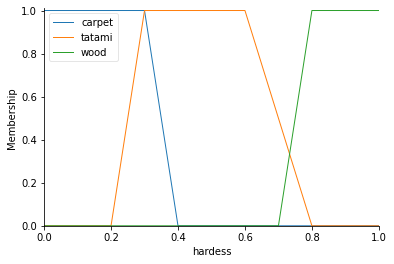

In [33]:

hardess['carpet'] = fuzz.trapmf(cleaness.universe,[0,0,0.3,0.4])
hardess['tatami'] = fuzz.trapmf(cleaness.universe,[0.2,0.3,0.6,0.8])
hardess['wood'] = fuzz.trapmf(cleaness.universe,[0.8,0.8,1,1])

hardess.view()

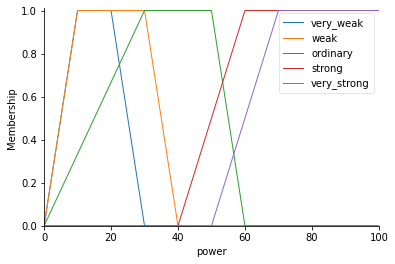

In [34]:
power['very_weak'] = fuzz.trapmf(power.universe,[0,10,20,30])
power['weak'] = fuzz.trapmf(power.universe,[0,10,30,40])
power['ordinary'] = fuzz.trapmf(power.universe,[0,30,50,60])
power['strong'] = fuzz.trapmf(power.universe,[40,60,100,100])
power['very_strong'] = fuzz.trapmf(power.universe,[50,70,100,100])

power.view()

In [35]:
#set rules for controller
rule1=ctrl.Rule(hardess['carpet'] & cleaness['very_dirty'], power['very_strong'])
rule2=ctrl.Rule(hardess['carpet'] & cleaness['dirty'], power['strong'])
rule3=ctrl.Rule(hardess['carpet'] & cleaness['rather_dirty'], power['ordinary'])
rule4=ctrl.Rule(hardess['carpet'] & cleaness['almost_clean'], power['ordinary'])
rule5=ctrl.Rule(hardess['carpet'] & cleaness['clean'], power['weak'])

rule6=ctrl.Rule(hardess['tatami'] & cleaness['very_dirty'], power['very_strong'])
rule7=ctrl.Rule(hardess['tatami'] & cleaness['dirty'], power['strong'])
rule8=ctrl.Rule(hardess['tatami'] & cleaness['rather_dirty'], power['ordinary'])
rule9=ctrl.Rule(hardess['tatami'] & cleaness['almost_clean'], power['weak'])
rule10=ctrl.Rule(hardess['tatami'] & cleaness['clean'], power['very_weak'])

rule11=ctrl.Rule(hardess['wood'] & cleaness['very_dirty'], power['strong'])
rule12=ctrl.Rule(hardess['wood'] & cleaness['dirty'], power['ordinary'])
rule13=ctrl.Rule(hardess['wood'] & cleaness['rather_dirty'], power['weak'])
rule14=ctrl.Rule(hardess['wood'] & cleaness['almost_clean'], power['very_weak'])
rule15=ctrl.Rule(hardess['wood'] & cleaness['clean'], power['very_weak'])

In [36]:
#begin training, how many rules much tell
powering_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
powering = ctrl.ControlSystemSimulation(powering_control)

In [41]:
#input for testing, use from 0 to 1, tick 0,1
#dirty soft tatami expected STRONG power
powering.input['cleaness'] = 0.4 
powering.input['hardess'] = 0.5

57.110377924415104


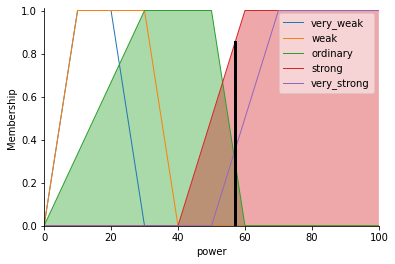

In [42]:
powering.compute()
print(powering.output['power'])
power.view(sim=powering)